In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('emailOpen-campaign-2101876 -- 05-26-21.csv')

In [ ]:
df1.merge(df2, how='inner', )

In [ ]:
df.head()

,ip,email,country,userAgent,templateId,messageId,createdAt,region,campaignId,userAgentDevice,eventName,city
0,74.125.212.138,bkierl8@gmail.com,NaN,Mozilla/5.0 (Windows NT 5.1; rv:11.0) Gecko Fi...,2884169,b73e59d55c884694a48205a3efe4946c,2021-03-21 20:32:52 +00:00,NaN,2101876,Gmail,NaN,NaN
1,66.102.8.86,seth.stonis@gmail.com,NaN,Mozilla/5.0 (Windows NT 5.1; rv:11.0) Gecko Fi...,2884169,1aeaeb70d1b4428e8ba9723df1a6ad42,2021-03-21 20:31:37 +00:00,NaN,2101876,Gmail,NaN,NaN
2,66.249.84.63,tee.elizn@gmail.com,NaN,Mozilla/5.0 (Windows NT 5.1; rv:11.0) Gecko Fi...,2884169,87f775a2baa24058821296833448b286,2021-03-21 20:34:36 +00:00,NaN,2101876,Gmail,NaN,NaN
3,174.192.194.51,josiehutson@hotmail.com,United States,Mozilla/5.0 (iPhone; CPU iPhone OS 14_4 like M...,2884169,37a42f4638ef45948eaae3af0b9cee1c,2021-03-21 20:34:38 +00:00,MD,2101876,iPhone,NaN,College Park
4,174.192.194.51,josiehutson@hotmail.com,United States,Mozilla/5.0 (iPhone; CPU iPhone OS 14_4 like M...,2884169,37a42f4638ef45948eaae3af0b9cee1c,2021-03-21 20:34:38 +00:00,MD,2101876,iPhone,NaN,College Park


In [ ]:
df.createdAt= pd.to_datetime(df.createdAt)

In [ ]:
df.email=df.email.str.strip()

In [ ]:
len(df.email.unique())

91154

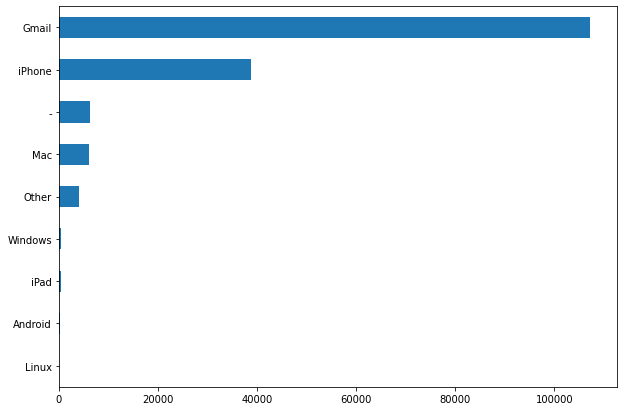

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
df.userAgentDevice.value_counts().sort_values().plot(kind='barh')

In [ ]:
df.columns

Index(['ip', 'email', 'country', 'userAgent', 'templateId', 'messageId',
       'createdAt', 'region', 'campaignId', 'userAgentDevice', 'eventName',
       'city'],
      dtype='object')

In [ ]:
df.shape

(163904, 12)

In [ ]:
len(df.ip.unique())

27798

In [ ]:
df1=df.groupby('createdAt').size()

In [ ]:
df2= df.groupby('createdAt')['email'].agg('nunique')

In [ ]:
df1.resample('D').sum()

createdAt
2021-03-19 00:00:00+00:00     2658
2021-03-20 00:00:00+00:00     8089
2021-03-21 00:00:00+00:00    19771
2021-03-22 00:00:00+00:00    40659
2021-03-23 00:00:00+00:00    38520
                             ...  
2021-05-22 00:00:00+00:00       18
2021-05-23 00:00:00+00:00       28
2021-05-24 00:00:00+00:00       29
2021-05-25 00:00:00+00:00       20
2021-05-26 00:00:00+00:00       15
Freq: D, Length: 69, dtype: int64

In [ ]:
d11= df1.resample('d',).sum()
d21= df2.resample('d').sum()

In [ ]:
#  pd.DatetimeIndex([i.replace(tzinfo=None) for i in d11.index])
d21.index= d21.index.tz_localize(None)
d11.index= d11.index.tz_localize(None)

In [ ]:
d21

createdAt
2021-03-19     2561
2021-03-20     7792
2021-03-21    18904
2021-03-22    38981
2021-03-23    36940
              ...  
2021-05-22       18
2021-05-23       26
2021-05-24       29
2021-05-25       20
2021-05-26       15
Name: email, Length: 69, dtype: int64

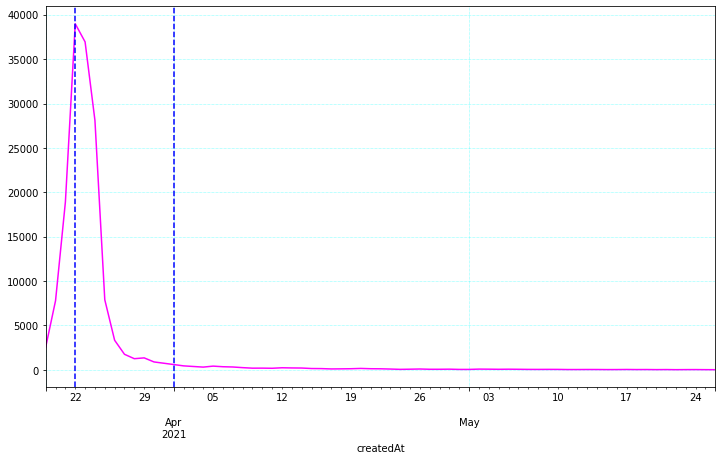

In [ ]:
plt.figure(figsize=(12,7))
# d11.plot(kind='line', color= 'orange')
d21.plot(kind='line', color= 'magenta')
plt.grid(color='cyan', linestyle=':', linewidth=.5)
plt.axvline('04-01-2021', color='blue', linestyle='--')
plt.axvline('03-22-2021', color='blue', linestyle='--')
# plt.axvline(d21[d21==d21.min()].index.values[0]+ np.timedelta64(15, 'D'), color='k', linestyle='--')

In [ ]:
import numpy as np
print(d21[d21==d21.max()].index.values[0]+ np.timedelta64(15, 'D'))
print(d21[d21==d21.max()].index.values[0]- np.timedelta64(15, 'D'))

2021-04-06T00:00:00.000000000
2021-03-07T00:00:00.000000000


In [ ]:
# df1=df.createdAt.value_counts().reset_index()

In [ ]:
uf= pd.read_csv('/content/usage.csv')

In [ ]:
uf.shape

(808351, 4)

In [ ]:
uf.email = uf.email.str.strip()

In [ ]:
uf1= uf.loc[uf.email.isin(df.email.tolist())]

In [ ]:
len(uf1.email.unique())

61442

In [ ]:
uf1.day = pd.to_datetime(uf1.day)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
uf2= uf.loc[~uf.email.isin(df.email.tolist())]

In [ ]:
uf2.day= pd.to_datetime(uf2.day)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
uf2.dtypes

user_id               int64
email                object
day          datetime64[ns]
app_vends             int64
dtype: object

In [ ]:
met_dict1= {'email':'nunique', 'app_vends': 'sum'}

In [ ]:
af1= uf1.groupby('day').agg(met_dict1)

In [ ]:
af11= af1.app_vends/af1.email

In [ ]:
af2= uf2.groupby('day').agg(met_dict1)

In [ ]:
af21= af2.app_vends/af2.email

In [ ]:
df3=pd.concat([d21,af11,af21], join='inner', axis=1)

In [ ]:
df3.columns=['EmailOpens', 'Opens', 'All_Others']

In [ ]:
df4=df3.loc[df3.index <= '04-01-2021']

In [ ]:
df4['variation']= (df4.Opens- df4['All_Others'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


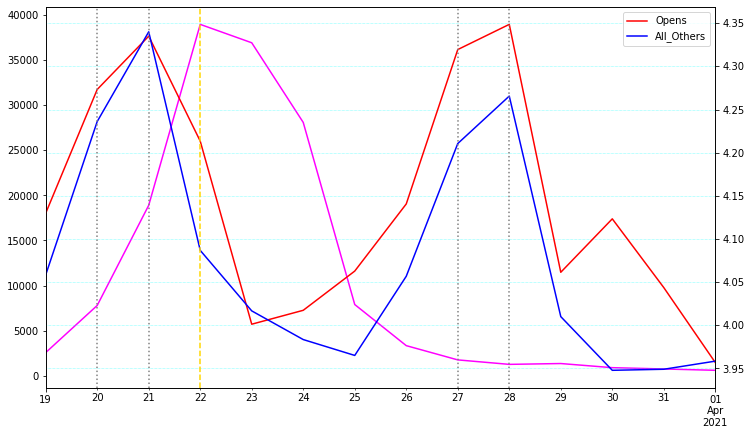

In [ ]:
plt.figure(figsize=(12,7))
df4.Opens.plot( kind='line', color= 'red', secondary_y= True)
df4.All_Others.plot( kind='line', color= 'blue', secondary_y= True)
df4.EmailOpens.plot( kind='line', color= 'magenta', secondary_y= False)
plt.axvline('03-20-2021', color='gray', linestyle=':')
plt.axvline('03-21-2021', color='gray', linestyle=':')
plt.axvline('03-27-2021', color='gray', linestyle=':')
plt.axvline('03-28-2021', color='gray', linestyle=':')
plt.axvline('03-22-2021', color='gold', linestyle='--')
plt.grid(color='cyan', linestyle=':', linewidth=.5)
plt.legend()

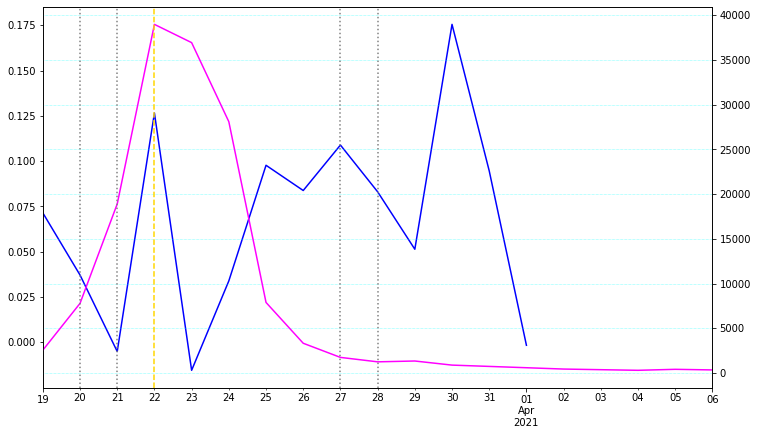

In [ ]:
plt.figure(figsize=(12,7))
df3.EmailOpens.plot( kind='line', color= 'magenta', secondary_y= True)
df4.variation.plot( kind='line', color= 'blue', secondary_y= False)
plt.axvline('03-20-2021', color='gray', linestyle=':')
plt.axvline('03-21-2021', color='gray', linestyle=':')
plt.axvline('03-27-2021', color='gray', linestyle=':')
plt.axvline('03-28-2021', color='gray', linestyle=':')
plt.axvline('03-22-2021', color='gold', linestyle='--')
plt.grid(color='cyan', linestyle=':', linewidth=.5)
# df3.targets.plot( kind='line', color= 'orange', secondary_y= False)

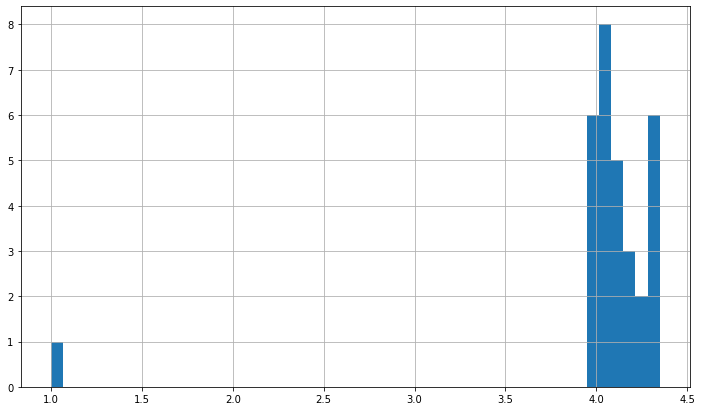

In [ ]:
plt.figure(figsize=(12,7))
af11.hist(bins=50)

In [ ]:
t_usage= uf2.loc[uf2.day >= '2021-03-22'].groupby('user_id')['app_vends'].agg('sum')

In [ ]:
nt_usage= uf1.loc[uf1.day >= '2021-03-22'].groupby('user_id')['app_vends'].agg('sum')

In [ ]:
flags=['Non Targets']*len(nt_usage)+ ['Targets']*len(t_usage)

In [ ]:
box=pd.concat([t_usage, nt_usage], axis=0, names=['Target', 'Non Target']).reset_index()
box['flg']= flags

In [ ]:
box.app_vends.describe(percentiles=[.05,.95])

count    205959.000000
mean          7.821974
std           7.225439
min           1.000000
5%            2.000000
50%           6.000000
95%          21.000000
max         426.000000
Name: app_vends, dtype: float64

In [ ]:
b1= box.loc[box.app_vends <=21]

In [ ]:
box.groupby('flg')['app_vends'].agg('describe')

,count,mean,std,min,25%,50%,75%,max
flg,,,,,,,,
Non Targets,50435.0,8.336393,7.759323,1.0,4.0,6.0,11.0,158.0
Targets,155524.0,7.655153,7.035576,1.0,3.0,6.0,10.0,426.0


In [ ]:
b1.groupby('flg')['app_vends'].agg('describe')

,count,mean,std,min,25%,50%,75%,max
flg,,,,,,,,
Non Targets,47501.0,6.931117,4.663923,1.0,4.0,6.0,10.0,21.0
Targets,148961.0,6.639953,4.495131,1.0,3.0,6.0,9.0,21.0


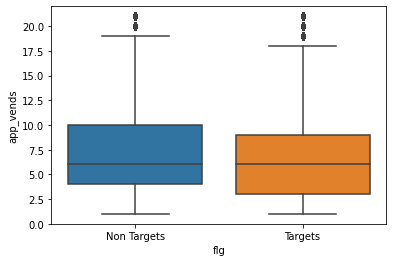

In [ ]:
sns.boxplot(x="flg", y="app_vends", data=b1)